In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data from CSV file
df = pd.read_csv('Jira_exported_data.csv', sep=';')

print(df.isnull().sum())

Issue id    0
Created     0
Resolved    0
dtype: int64


In [3]:
def convert_to_datetime(df):
    """
    Converts 'Created' and 'Resolved' columns to datetime format
    """
    try:
        df['Created'] = pd.to_datetime(df['Created'])
        df['Resolved'] = pd.to_datetime(df['Resolved'])
    except Exception as e:
        print(f"Error in converting columns to datetime: {str(e)}")
        raise e # Re-raise the exception to see the full traceback
    """Calculates 'Delivery_Time'in days with correct rounding up and plots its boxplot"""

    df.loc[:, 'Delivery_Time'] = np.ceil((df['Resolved'] - df['Created']).dt.total_seconds() / 86400).astype(int)
        
convert_to_datetime(df)

print(df.dtypes) #Check the conversion was applied for Created and Resolved: should be datetime64[ns]


Issue id                  int64
Created          datetime64[ns]
Resolved         datetime64[ns]
Delivery_Time             int64
dtype: object


In [4]:
print(df.head())

   Issue id             Created            Resolved  Delivery_Time
0    293603 2024-02-22 09:38:00 2024-02-22 17:32:00              1
1    293491 2024-02-21 18:44:00 2024-02-22 11:43:00              1
2    292985 2024-02-20 10:09:00 2024-02-22 21:54:00              3
3    292965 2024-02-19 19:41:00 2024-02-20 13:53:00              1
4    292956 2024-02-19 18:23:00 2024-02-20 10:54:00              1


In [5]:
# Filter dataframe for rows where Delivery_Time is zero
df_zero_delivery = df[df['Delivery_Time'] == 0]

# Display the count of rows and the rows
print(f"Number of rows where Delivery_Time is zero: {df_zero_delivery.shape[0]}")
print(df_zero_delivery)

Number of rows where Delivery_Time is zero: 1
     Issue id             Created            Resolved  Delivery_Time
361    274647 2023-11-06 09:44:00 2023-11-06 09:44:00              0


In [6]:
# Removing rows where Delivery_Time is zero
df = df[df['Delivery_Time'] != 0]

# Display the updated DataFrame
print(df)

     Issue id             Created            Resolved  Delivery_Time
0      293603 2024-02-22 09:38:00 2024-02-22 17:32:00              1
1      293491 2024-02-21 18:44:00 2024-02-22 11:43:00              1
2      292985 2024-02-20 10:09:00 2024-02-22 21:54:00              3
3      292965 2024-02-19 19:41:00 2024-02-20 13:53:00              1
4      292956 2024-02-19 18:23:00 2024-02-20 10:54:00              1
..        ...                 ...                 ...            ...
369    274348 2023-11-02 11:28:00 2023-11-03 15:19:00              2
370    274313 2023-11-01 22:15:00 2023-11-06 12:01:00              5
371    274260 2023-11-01 14:17:00 2023-11-02 21:33:00              2
372    274231 2023-11-01 11:15:00 2023-11-14 12:40:00             14
373    274217 2023-11-01 10:13:00 2023-11-02 15:07:00              2

[373 rows x 4 columns]


Statistics for Delivery_Time:
count    373.000000
mean      10.142091
std       12.685131
min        1.000000
25%        1.000000
50%        5.000000
75%       14.000000
95%       34.400000
99%       59.560000
max       78.000000
Name: Delivery_Time, dtype: float64
Skewness: 2.1847
Kurtosis: 5.7967


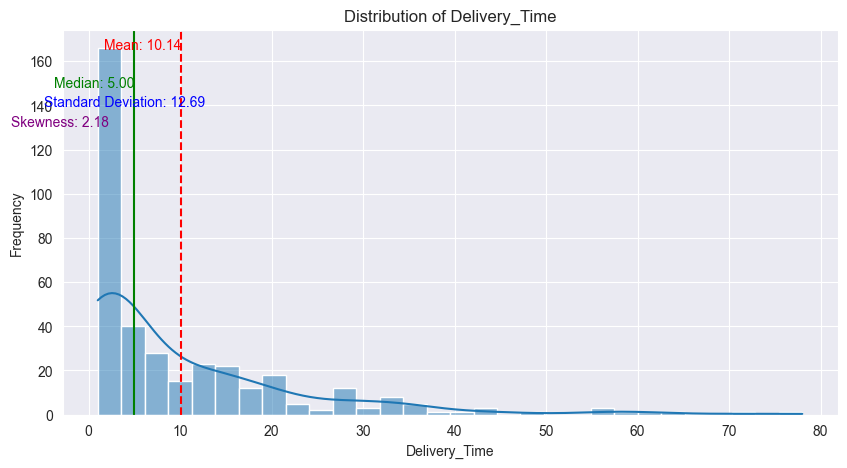

In [7]:
# Initialize stats_df as an empty DataFrame
stats_df = pd.DataFrame()


def plot_distribution_and_stats(df, column_name='Delivery_Time'):
    column_data = df[column_name]
    column_stats = column_data.describe(percentiles=[.25, .5, .75, .95, .99])
    skewness = column_data.skew()
    kurtosis = column_data.kurt()
    print(f"Statistics for {column_name}:")
    print(column_stats)
    print(f'Skewness: {skewness:.4f}')
    print(f'Kurtosis: {kurtosis:.4f}')
    global stats_df
    new_df = pd.DataFrame({
        'Column': [column_name],
        'Mean': [column_stats['mean']],
        'Median': [column_stats['50%']],
        'Std Dev': [column_stats['std']],
        '25%': [column_stats['25%']],
        '75%': [column_stats['75%']],
        '95%': [column_stats['95%']],
        '99%': [column_stats['99%']],
        'Skewness': [skewness],
        'Kurtosis': [kurtosis]
    })
    stats_df = pd.concat([stats_df, new_df], ignore_index=True)
    plt.figure(figsize=(10, 5))
    sns.histplot(column_data, kde=True, bins=30)
    plt.axvline(column_stats['mean'], color='r', linestyle='--')
    plt.axvline(column_stats['50%'], color='g', linestyle='-')
    plt.text(column_stats['mean'], plt.ylim()[1] * 0.95, f'Mean: {column_stats["mean"]:.2f}', color='r', ha='right')
    plt.text(column_stats['50%'], plt.ylim()[1] * 0.85, f'Median: {column_stats["50%"]:.2f}', color='g', ha='right')
    plt.text(column_stats['std'], plt.ylim()[1] * 0.80, f'Standard Deviation: {column_stats["std"]:.2f}', color='b',
             ha='right')
    plt.text(skewness, plt.ylim()[1] * 0.75, f'Skewness: {skewness:.2f}', color='purple', ha='right')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column_name}')
    plt.show()


# pass the name of the column here in 'your_column_name'
plot_distribution_and_stats(df, 'Delivery_Time')



In [11]:
# Filter dataframe for rows where Delivery_Time is zero
df_zero_delivery = df[df['Delivery_Time'] == 0]

# Display the count of rows and the rows
print(f"Number of rows where Delivery_Time is zero: {df_zero_delivery.shape[0]}")
print(df_zero_delivery)

Number of rows where Delivery_Time is zero: 1
     Issue id             Created            Resolved  Delivery_Time
361    274647 2023-11-06 09:44:00 2023-11-06 09:44:00              0
